In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
df.rename(columns={'Embarked': 'Station'}, inplace=True)

In [138]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S


Step1: Column Label (numeric, categorical, mixed) <br> <br>
Numeric - PassengerId, Age, Fare <br>
Categorical - Survived, Pclass, Sex, Station <br>
Mixed - Name, Ticket, Cabin <br>

---------

**Univariate Analysis** <br>
Univariate analysis focuses on analyzing each feature in the dataset independently. <br>

- Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion. <br>

- Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

------

The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include: <br><br>
**Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails. <br>

**Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed). <br>

**Bimodal Distribution**: A distribution with two peaks or modes. <br>

**Uniform Distribution**: A distribution where all values have an equal chance of occurring. <br>

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

-------

Dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data. <br>
There are several measures of dispersion, including:

**Range**: The difference between the largest and smallest values in a data set.

**Variance**: The average of the squared deviations of each value from the mean of the data set.

**Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

***Interquartile range (IQR)***: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

---------------

Steps of doing Univariate Analysis on Numerical columns <br> <br>
**Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

I**dentifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

-----------

Age Column <br>
**conclusion**: <br>
- 75% that is most of the pople are younger in this ship i.e age less than 40
- data is almost normally distributed
- 20% values are null

In [139]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

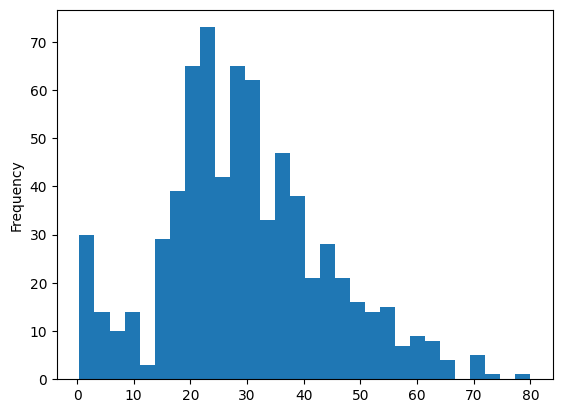

In [140]:
df['Age'].plot(kind='hist', bins=30)

In [141]:
less = df[df['Age']<40].value_counts().sum()
more = df[df['Age']>40].value_counts().sum()
less,more

(114, 65)

<Axes: ylabel='Density'>

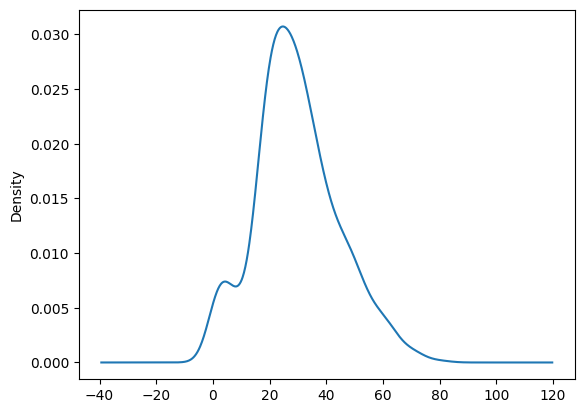

In [142]:
df['Age'].plot(kind='kde')          # kde is used to check distribution of data

In [143]:
df['Age'].skew()            

0.38910778230082704

<Axes: >

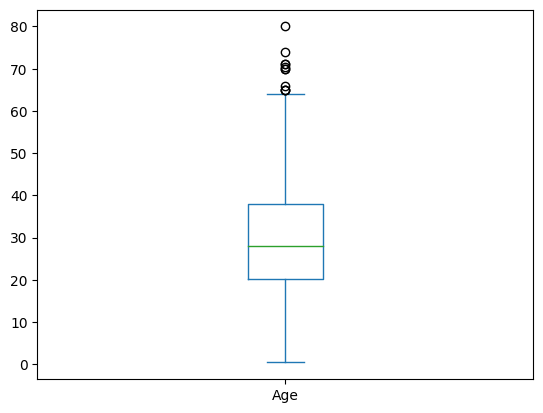

In [144]:
df['Age'].plot(kind='box')                  # outlier detection

Looks like data has outliers from age 65 to 80, lets validate it

In [145]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


After checking data of people with age>65 looks normal i.e correct so leaving as it is

In [146]:
df['Age'].isnull().sum() / len(df['Age'])

0.19865319865319866

In [147]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [148]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].isnull().sum()

0

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Column - Fare <br>
- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare
- No null values

In [150]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

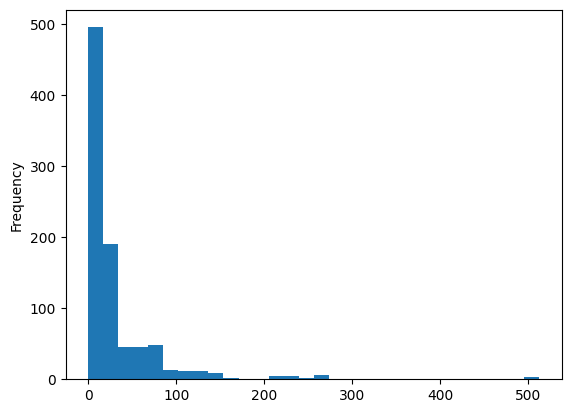

In [151]:
df['Fare'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

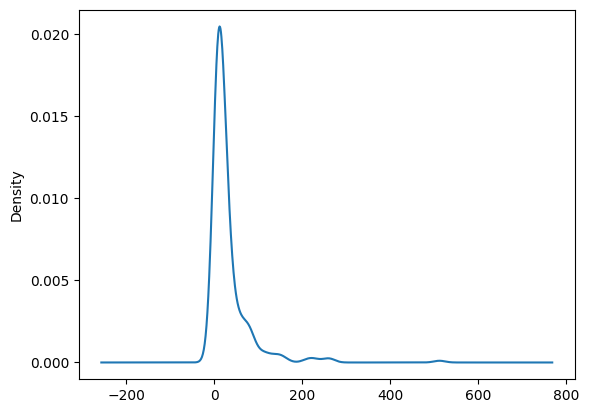

In [152]:
df['Fare'].plot(kind='kde')

In [153]:
df['Fare'].skew()

4.787316519674893

<Axes: >

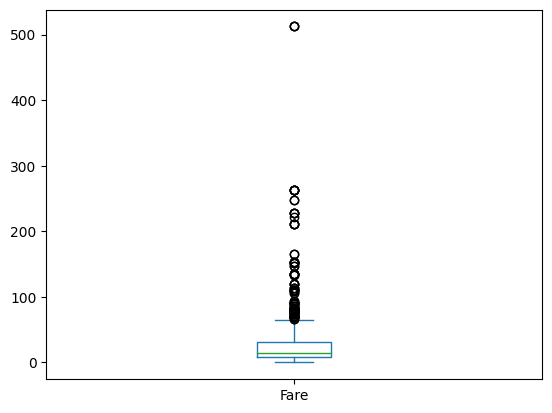

In [154]:
df['Fare'].plot(kind='box')

In [155]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [156]:
df[df['Ticket']=='19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


As we can see ticket is same for 4 person that means it is a family where price is paid only once of whole family, but <br>
all family member have same price, thus feature enginnerring is to be done

In [157]:
df['Fare'].isnull().sum()

0

**Steps of doing Univariate Analysis on Categorical columns** <br><br>
**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

Column - Survived <br>

**conclusion** :<br>
- 61% of the people died, only 39% survived

In [158]:
df['Survived'].isnull().sum()

0

In [159]:
df['Survived'].value_counts()           # 342 survived

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

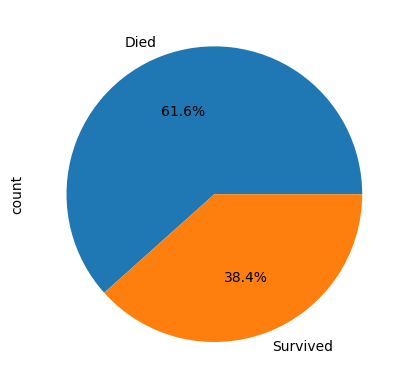

In [160]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%', labels=['Died', 'Survived'])

In [161]:
df['Station'].value_counts()

Station
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Station'>

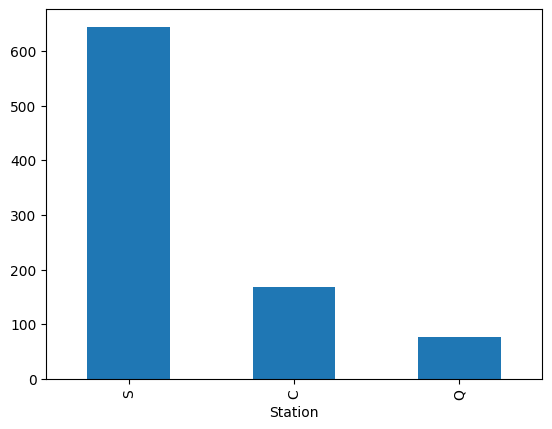

In [162]:
df['Station'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

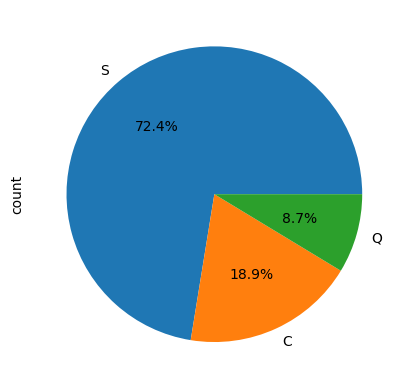

In [163]:
df['Station'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [164]:
df[df['Station'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [165]:
df['Station'].fillna('C', inplace=True)

In [166]:
df['Station'].isnull().sum()

0

Column - Sex

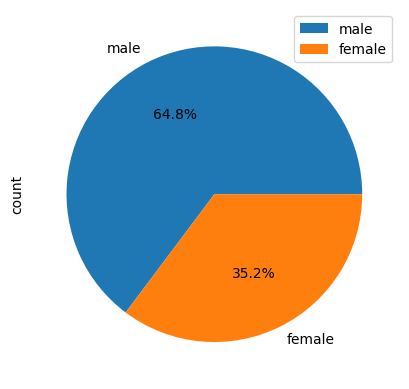

In [167]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%', labels=['male','female'])
plt.legend()
plt.show()

Male are more than female on ship

In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Steps of doing Bivariate Analysis**
Select 2 cols

Understand type of relationship

**Numerical - Numerical** <br>
a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots <br>
b. Check correlation coefficent to check linear relationship <br>
**Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data. <br>
a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots <br>
**Categorical - Categorical** <br>
a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column. <br>
b. You can plots like heatmap, stacked barplots, treemaps <br>
Write your conclusions

In [169]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived - all other col

**conclusion**: 
- 1st class passenger are provided more priority thus 63% people survived and 37% died
- 3rd class passenger having less priority thus highest 75% people died
- 74% female survived and only 18% men survived, that means female are given more priority
- Most people from Station C survived than other station, might because it have more 1st class people or more female 
- Most of the 1st class people are from Station C, so C station maybe the rich city <br>

Final Conclusion - People will have more survival probability if They are Female or from 1st class passenger

In [170]:
pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100       # normalize is used to show percentage between 0-1 range thus mul with 100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

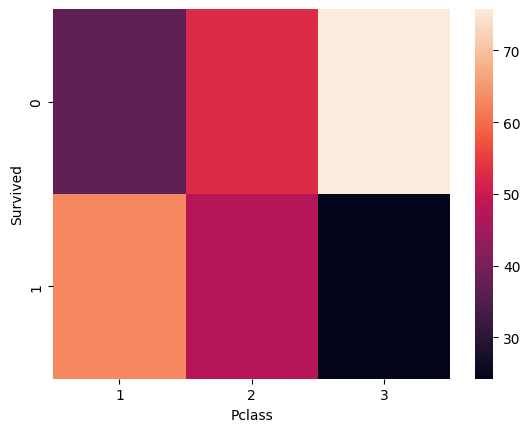

In [171]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100)

In [172]:
pd.crosstab(df['Survived'],df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [173]:
pd.crosstab(df['Survived'],df['Station'], normalize='columns')*100

Station,C,Q,S
Survived,,,
0,44.642857,59.493671,66.304348
1,55.357143,40.506329,33.695652


In [174]:
pd.crosstab(df['Sex'],df['Station'], normalize='columns')*100

Station,C,Q,S
Sex,,,
female,43.452381,48.101266,31.521739
male,56.547619,51.898734,68.478261


In [175]:
pd.crosstab(df['Pclass'],df['Station'], normalize='columns')*100

Station,C,Q,S
Pclass,,,
1,50.595238,5.063291,19.720497
2,10.119048,3.797468,25.465839
3,39.285714,91.139241,54.813665


Most of the 1st class people are from Station C, so C station maybe the rich city

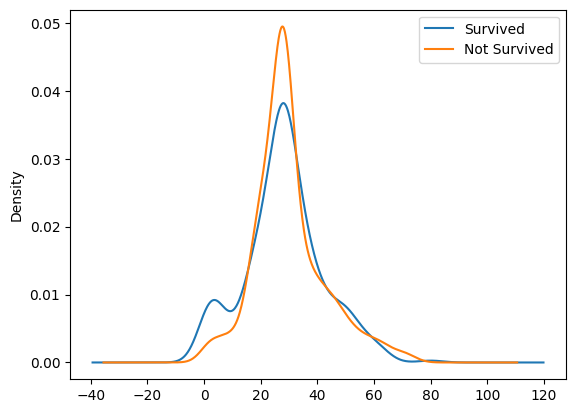

In [176]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [177]:
df[df['Pclass'] == 1]['Age'].mean()         # avg age of people from 1st class

36.81212962962963

**Feature Engineering**

In [178]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,NaN,S


As we can see There are: <br>
SibSp (8) + Parch (2) = 8+2 = 10 members + 1 (self) = 11<br>
But in dataset we can see only 7 members above, So other family data is present in titanic_test.csv file

In [179]:
df1 = pd.read_csv('titanic_test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Note: Survived Column is missing in test data because it is test dataset survived we have to predict

In [180]:
df = pd.concat([df,df1])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,NaN,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,NaN,S


In [181]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
201,202,0.0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
324,325,0.0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
792,793,0.0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,NaN,S


Now total 11 memebers

Now we get individual fare by diving the total family members by addition of (siblings+parentChild)

In [182]:
df['Individual_fare'] = df['Fare'] / (df['SibSp']+df['Parch']+1)

In [183]:
df.iloc[159]

PassengerId                               160
Survived                                  0.0
Pclass                                      3
Name               Sage, Master. Thomas Henry
Sex                                      male
Age                                      28.0
SibSp                                       8
Parch                                       2
Ticket                               CA. 2343
Fare                                    69.55
Cabin                                     NaN
Station                                     S
Embarked                                  NaN
Individual_fare                      6.322727
Name: 159, dtype: object

<Axes: >

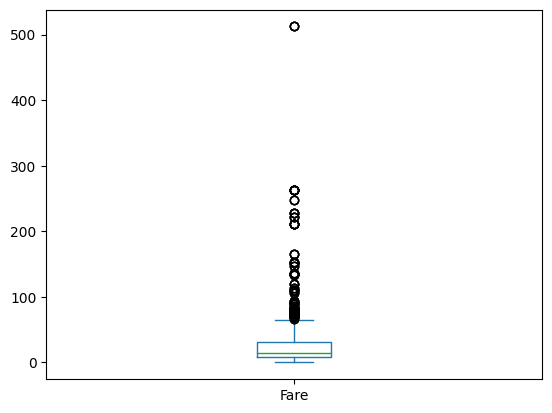

In [184]:
df['Fare'].plot(kind='box')

<Axes: >

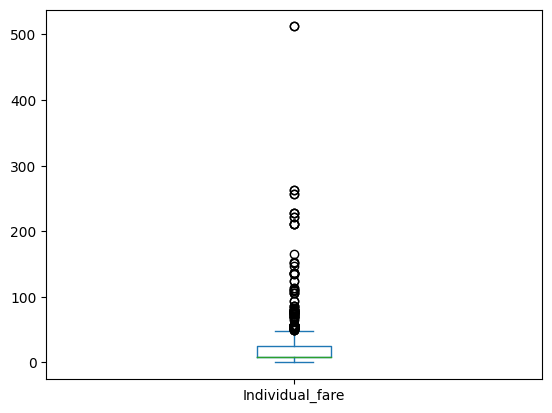

In [185]:
df['Individual_fare'].plot(kind='box')

Still we can see outlier of fare 500

In [186]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked,Individual_fare
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN,512.3292
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,NaN,256.1646
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,NaN,512.3292
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,NaN,C,256.1646


There is a posibility that a person who actually paid $512. 

In [187]:
df['Family_size'] = df['SibSp']+df['Parch'] + 1           # (1 = self i.e family member he have + self)

In [188]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked,Individual_fare,Family_size
25,917,NaN,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.500,NaN,NaN,S,7.250000,2
229,1121,NaN,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.000,NaN,NaN,S,13.000000,1
78,970,NaN,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.000,NaN,NaN,S,13.000000,1
41,42,0.0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.000,NaN,S,NaN,10.500000,2
165,166,1.0,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.525,NaN,S,NaN,6.841667,3


In [189]:
# Family_type
'''
1 = alone
2-4 = small_family
greater than 4 = large
'''

def getFamilyType(size):

    if size==1:
        return 'alone'
    elif size>1 and size<5:
        return 'small_fam'
    else:
        return 'large_fam'

In [190]:
df['Family_Type'] = df['Family_size'].map(lambda x: getFamilyType(x))

In [191]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked,Individual_fare,Family_size,Family_Type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.62500,2,small_fam
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.64165,2,small_fam
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,7.92500,1,alone


BinaryVariate analysis with new col created <br>

**conclusions**: 
- if person is having small family his changes of survival is more than other

In [193]:
pd.crosstab(df['Survived'], df['Family_Type'], normalize='columns')*100

Family_Type,alone,large_fam,small_fam
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


Feature Enginerring on Name col:
1) New col of Surname to identify its family
2) Married Status By gettting (Mr, Ms, other)

In [203]:
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [204]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Station,Embarked,Individual_fare,Family_size,Family_Type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,3.62500,2,small_fam,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,35.64165,2,small_fam,Cumings


In [213]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [215]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [229]:
def category_for_title(title):
    if title=='Rev.' or title=='Dr.' or title=='Col.' or title=='Major.' or title=='Don.' or title=='Capt.' or title=='the' or title=='Jonkheer.':
        return "other"
    else:
        return title

In [230]:
df['title'] = df['title'].map(lambda x: category_for_title(x))

In [233]:
df['title'].sample(10)

781       Mrs.
624        Mr.
309       Mrs.
660     others
144        Mr.
667        Mr.
4          Mr.
199      Miss.
50     Master.
820       Mrs.
Name: title, dtype: object

In [234]:
df['title'].value_counts()

title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
others      26
Ms.          2
Mlle.        2
Mme.         1
Lady.        1
Sir.         1
Dona.        1
Name: count, dtype: int64

In [244]:
df['title'] = df['title'].replace('Ms.', 'Miss.')
df['title'] = df['title'].replace('Dona.', 'Mrs.')
df['title'] = df['title'].replace('Lady.', 'Miss.')
df['title'] = df['title'].replace('Sir.', 'Mr.')
df['title'] = df['title'].replace('Master.', 'Mr.')
df['title'] = df['title'].replace('Mlle.', 'Miss.')
df['title'] = df['title'].replace('Mme.', 'Mrs.')

In [245]:
df['title'].value_counts()

title
Mr.       819
Miss.     265
Mrs.      199
others     26
Name: count, dtype: int64

In [247]:
pd.crosstab(df['Survived'], df['title'], normalize='columns')*100

title,Miss.,Mr.,Mrs.,others
Survived,,,,
0.0,29.569892,81.182796,20.634921,71.428571
1.0,70.430108,18.817204,79.365079,28.571429


Mr. and Mrs. i.e females have high chance of Survival